# import libraries

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from ast import literal_eval

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

# Load Data

In [2]:
movies = pd.read_csv("movie_genre_data.tsv", sep = '\t')
movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"['Drama', 'World cinema']"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"['Action/Adventure', 'Science Fiction', 'Action', 'Drama']"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"['Musical', 'Action', 'Drama', 'Bollywood']"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"['Screwball comedy', 'Comedy']"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"['Crime Fiction', 'Drama', 'Docudrama', 'World cinema', 'Courtroom Drama']"


# Data Cleaning

In [3]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [4]:
movies['clean_plot'] = movies['plot'].apply(lambda x: clean_text(x))

# Data visualization

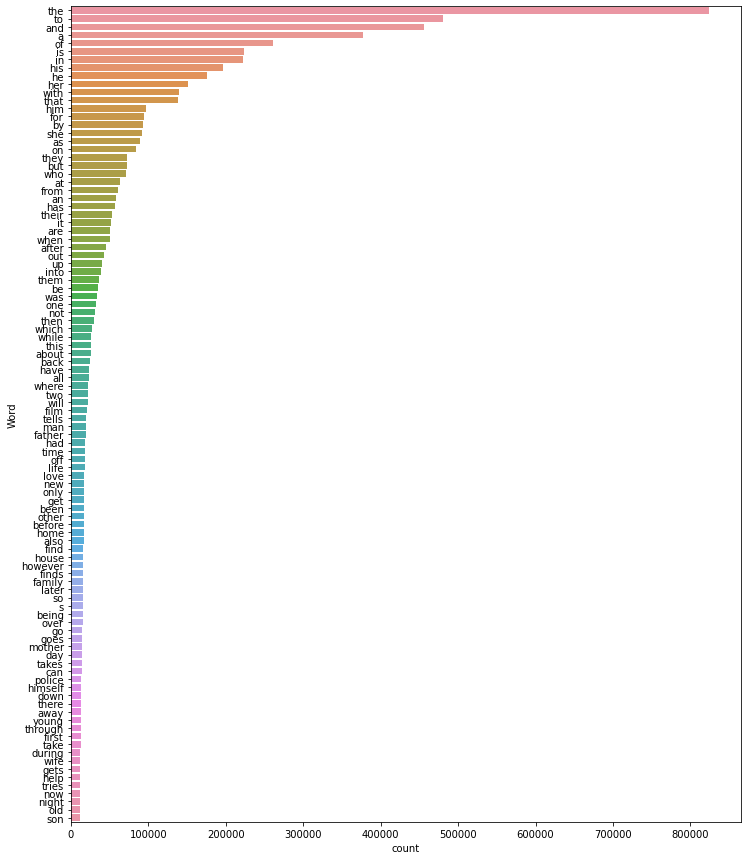

In [5]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(movies['clean_plot'], 100)

In [6]:
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [7]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies['clean_plot'] = movies['clean_plot'].apply(lambda x: remove_stopwords(x))

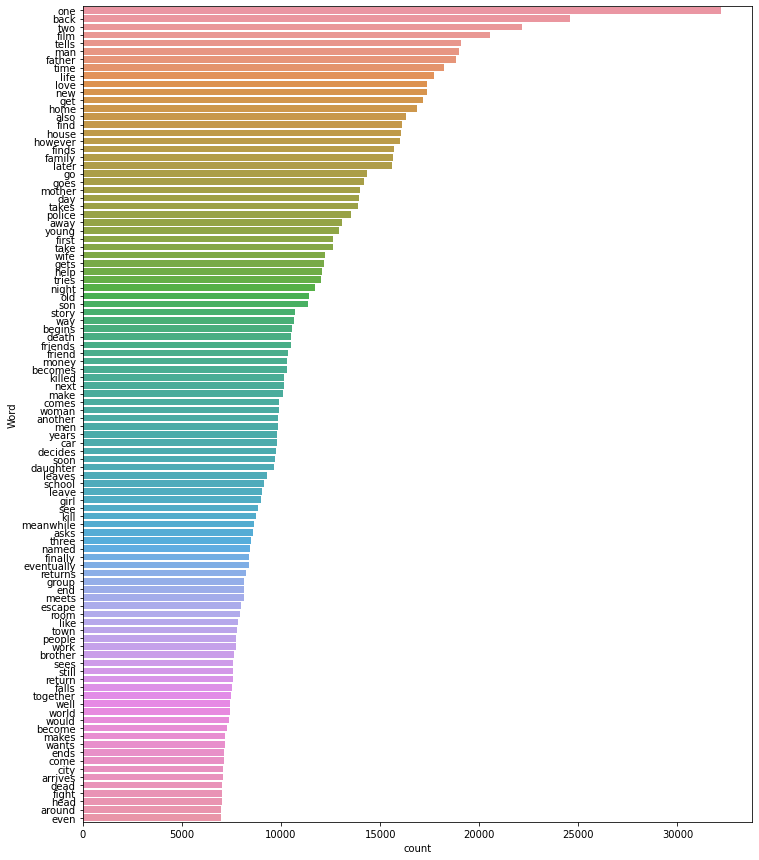

In [8]:
freq_words(movies['clean_plot'], 100)


In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()

movies.genre = movies.genre.apply(literal_eval)
multilabel_binarizer.fit(movies['genre'])

# transform target variable
y = multilabel_binarizer.transform(movies['genre'])

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [11]:
type(movies['genre'][0])

list

# split dataset into training and validation set

In [12]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(movies['clean_plot'], y, test_size=0.2, random_state=9)


In [13]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

Build  Movie Genre Prediction Model

In [14]:
#knn
from sklearn.neighbors import KNeighborsClassifier
# Performance metric
from sklearn.metrics import f1_score

In [15]:

clf =  KNeighborsClassifier()

In [16]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

KNeighborsClassifier()

In [17]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [18]:
y_pred[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Drama',)

In [20]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.2519636311705622

In [21]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

# Prediction Function

In [22]:
def prediction(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [23]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", movies['movie_name'][k], "\nPredicted genre: ", prediction(xval[k])), print("Actual genre: ",movies['genre'][k], "\n")


Movie:  Juke Joint 
Predicted genre:  [('Action', 'Action/Adventure', 'Adventure', 'Thriller')]
Actual genre:  ['Early Black Cinema', 'Black-and-white', 'Musical comedy', 'Musical', 'Race movie', 'Comedy'] 

Movie:  The Darkness Within 
Predicted genre:  [('Drama',)]
Actual genre:  ['Indie'] 

Movie:  Rising Stars 
Predicted genre:  [('Musical',)]
Actual genre:  ['Musical', 'Family Drama', 'Drama', 'Family Film'] 

Movie:  Dark Shadows 
Predicted genre:  [()]
Actual genre:  ['Thriller', 'Comedy-drama', 'Horror', 'Drama', 'Mystery'] 

Movie:  Kalisundam Raa 
Predicted genre:  [('Bollywood', 'Musical', 'World cinema')]
Actual genre:  ['Family Film'] 

